# Geographic Data with Basemap

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

C:\Users\Batakrishna\Anaconda3\envs\python27\lib\site-packages\mpl_toolkits\basemap\__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Batakrishna\Anaconda3\envs\python27\lib\site-packages\mpl_toolkits\basemap\__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

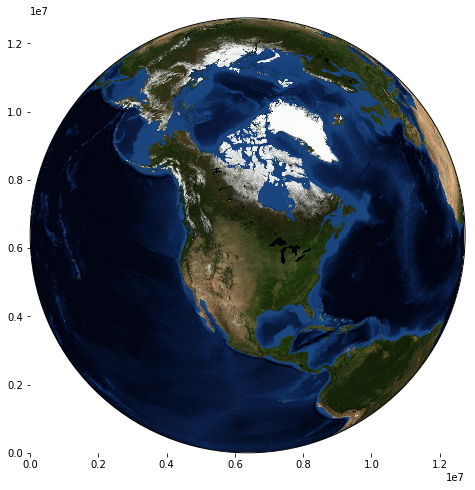

In [5]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

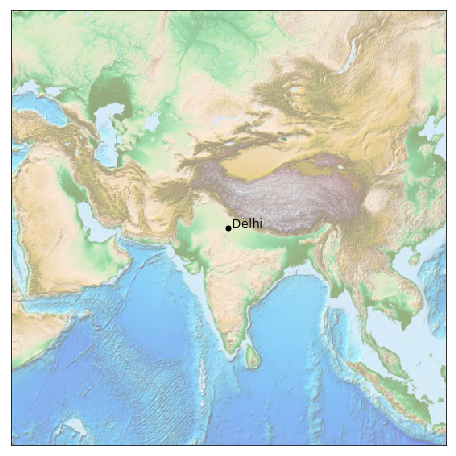

In [22]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=28.7041, lon_0=77.1025,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(77.1025, 28.7041)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Delhi', fontsize=12);

## Map Projections

The first thing to decide when using maps is what projection to use. You're probably familiar with the fact that it is impossible to project a spherical map, such as that of the Earth, onto a flat surface without somehow distorting it or breaking its continuity. These projections have been developed over the course of human history, and there are a lot of choices! Depending on the intended use of the map projection, there are certain map features (e.g., direction, area, distance, shape, or other considerations) that are useful to maintain.

The Basemap package implements several dozen such projections, all referenced by a short format code. Here we'll briefly demonstrate some of the more common ones.

In [23]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

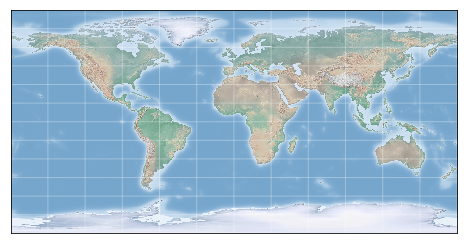

In [24]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

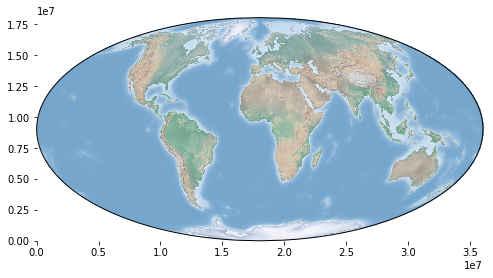

In [25]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

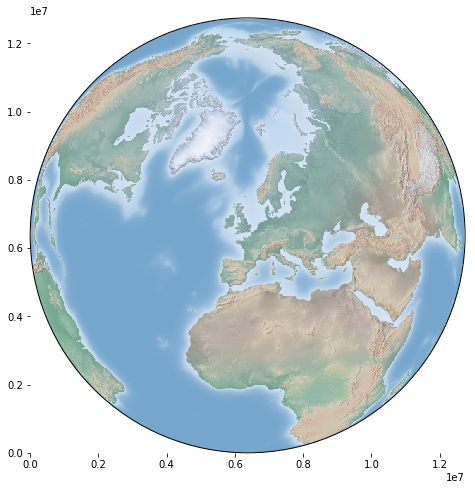

In [26]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

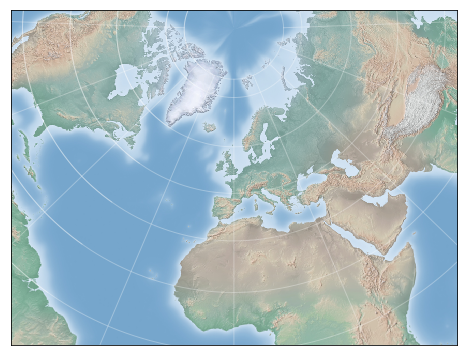

In [27]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

## Drawing a Map Background